In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('winequality-white.csv',sep=';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


<AxesSubplot:>

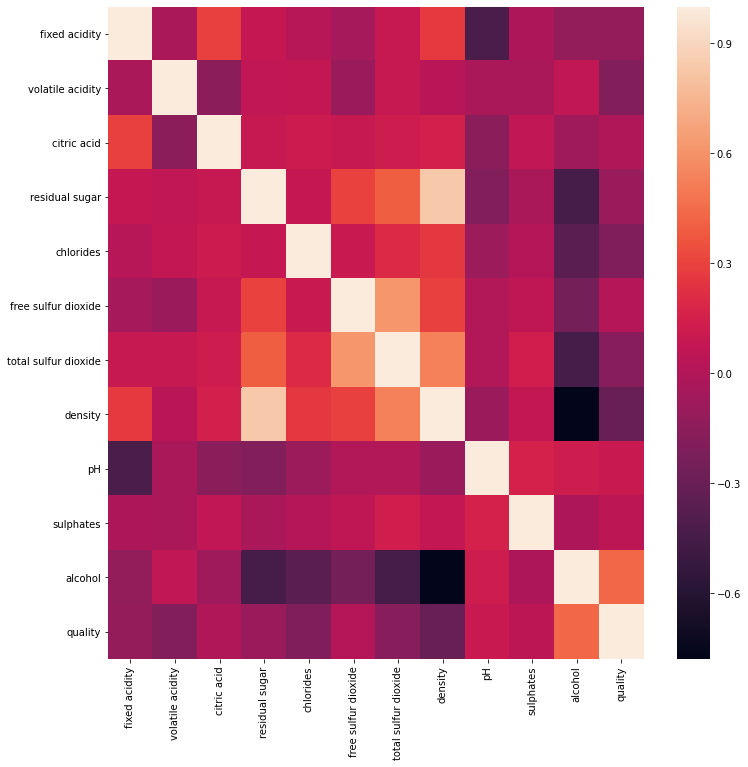

In [6]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

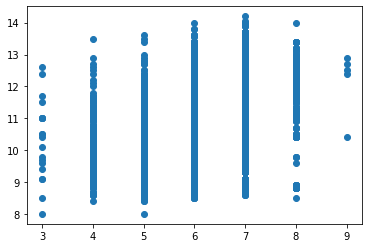

In [7]:
plt.scatter(df['quality'],df['alcohol'])

In [8]:
X = df.drop('quality',axis = 1)
y = df['quality']

In [9]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.30,random_state=531)

In [10]:
#We will calculate the mean square error for each model as we increase the number of n_estimators
from sklearn import ensemble
from sklearn.metrics import mean_squared_error

<h5>First, we will use a random forest regressor from ensemble models and fit it multiple times with different values of n_estimators

In [12]:
MSE_lst = []

#Lets vary the number of n_estimators between 50 and 500 with a step increase of 10
nTreeList = range(50, 500, 10)

In [13]:
#You can change the number of Max_Features to play with the model or even change the range of nTreeList
for n_Tree in nTreeList:
    
    depth = None
    Max_Features = 4
    #initialize our random forest model
    RF_ensemble_model = ensemble.RandomForestRegressor(n_estimators=n_Tree,
        max_depth=depth, max_features=Max_Features,
        oob_score=False, random_state=531)
    
    #fit our model with the training data 
    RF_ensemble_model.fit(xTrain,yTrain)
    #Get predictions from our model using our test data and store the mean squared error in the MSE_lst
    prediction = RF_ensemble_model.predict(xTest)
    MSE_lst.append(mean_squared_error(yTest, prediction))

Text(0, 0.5, 'Mean Squared Error')

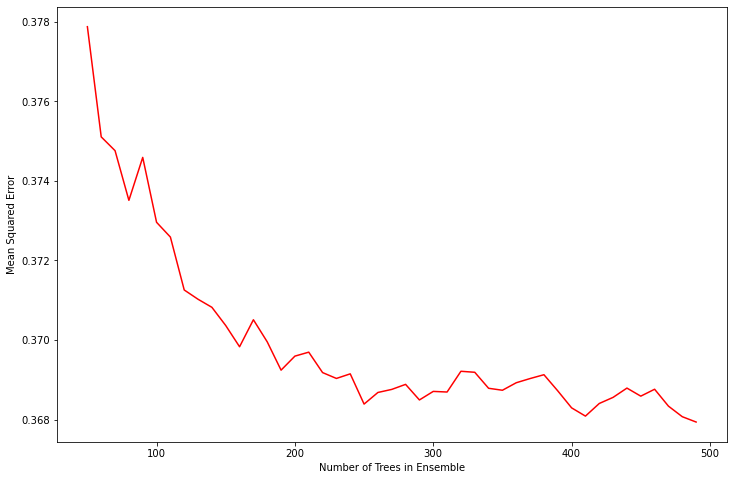

In [14]:
#lets plot the relation between n_estimator and the mean squared error
plt.figure(figsize=(12,8))
plt.plot(nTreeList, MSE_lst,'r')
plt.xlabel('Number of Trees in Ensemble')
plt.ylabel('Mean Squared Error')

In [15]:
#Lets also plot out the importance of each feature in a numerical form according to our model
Feat_Imp = RF_ensemble_model.feature_importances_
labels = df.columns

Text(0.5, 0, 'Variable Importance')

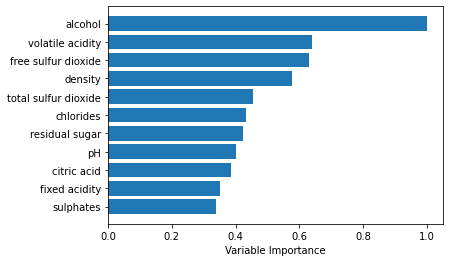

In [16]:
Feat_Imp = Feat_Imp / Feat_Imp.max()
Desc_Feat_Imp = np.argsort(Feat_Imp)
Desc_Bar_Pos = np.arange(Desc_Feat_Imp.shape[0]) + .5
plt.barh(Desc_Bar_Pos, Feat_Imp[Desc_Feat_Imp], align='center')
plt.yticks(Desc_Bar_Pos, labels[Desc_Feat_Imp])
plt.xlabel('Variable Importance')

<h4>Using the above data and visualizations, you can select a good value for n_estimators and the max_features and the variables to add to the model for fitting according to the feature importance and the correlation 

<h5>Now Lets use a gradient boosting regressor and compare the results</h5>

In [17]:
#These default values should be set if you are a beginner with the GB model
#You can play around the values as well
n_Est_GB = 2000
depth_GB = 7
learnRate_GB = 0.01
subSamp_GB = 0.5
GB_ensemble_model = ensemble.GradientBoostingRegressor(n_estimators=n_Est_GB, max_depth=depth_GB,
learning_rate=learnRate_GB, subsample = subSamp_GB, loss='ls')

#loss = > loss function = > 'ls' = > 'Least mean squared error'

In [18]:
GB_ensemble_model.fit(xTrain,yTrain)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=2000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.5, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [19]:
MSE_GB_lst = []
GB_pred = GB_ensemble_model.staged_predict(xTest)
for pred in GB_pred:
    MSE_GB_lst.append(mean_squared_error(yTest, pred))

In [20]:
#This shows the lowest value of loss during fitting and it occured at the 650th cycle
print(min(MSE_GB_lst))
print(MSE_GB_lst.index(min(MSE_GB_lst)))

0.37048495333110687
1989


Text(0, 0.5, 'Mean Squared Error')

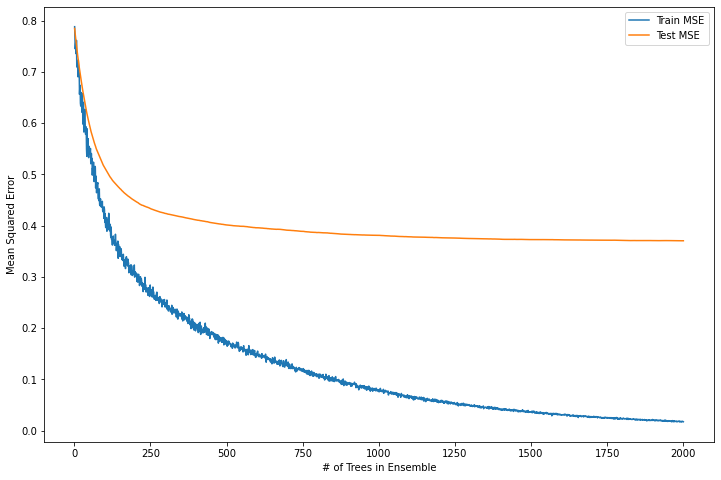

In [21]:
#Lets create some comparison plots
plt.figure(figsize=(12,8))
plt.plot(range(1, n_Est_GB + 1), GB_ensemble_model.train_score_,label='Train MSE')
plt.plot(range(1, n_Est_GB + 1), MSE_GB_lst, label='Test MSE')
plt.legend(loc='upper right')
plt.xlabel('# of Trees in Ensemble')
plt.ylabel('Mean Squared Error')

In [22]:
#Lets also plot out the importance of each feature in a numerical form according to our model and compare 
#it to the results of the random forest
GB_Feat_Imp = GB_ensemble_model.feature_importances_

Text(0.5, 0, 'Variable Importance')

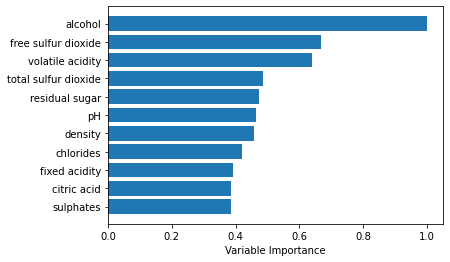

In [23]:
GB_Feat_Imp = GB_Feat_Imp / GB_Feat_Imp.max()
GB_Desc_Feat_Imp = np.argsort(GB_Feat_Imp)
GB_Desc_Bar_Pos = np.arange(GB_Desc_Feat_Imp.shape[0]) + .5
plt.barh(GB_Desc_Bar_Pos, GB_Feat_Imp[GB_Desc_Feat_Imp], align='center')
plt.yticks(GB_Desc_Bar_Pos, labels[GB_Desc_Feat_Imp])
plt.xlabel('Variable Importance')

<h4>Using the above data and visualizations, you can select a good value for n_estimators the variables to add to the model for fitting according to the feature importance. You can also play with the learning rate and depth and check the results